In [9]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

seed = 1
np.random.seed(seed)

We import our dataset here

In [10]:
df = pd.DataFrame()
df = pd.read_csv("https://raw.githubusercontent.com/christianesqueda/temp-repo/main/Training%20Data.csv")
df.shape

(252000, 13)

In [11]:
df[0::100]

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
100,101,4336059,54,12,single,rented,yes,Firefighter,Katihar,Bihar,12,13,0
200,201,5330432,47,2,single,rented,yes,Chemical_engineer,Bidhannagar,West_Bengal,2,10,0
300,301,2277429,42,18,single,rented,no,Analyst,Amaravati,Andhra_Pradesh,4,14,0
400,401,9454655,35,7,single,rented,no,Magistrate,Srikakulam,Andhra_Pradesh,7,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251500,251501,1128697,31,16,single,rented,no,Computer_hardware_engineer,Jalgaon,Maharashtra,10,13,0
251600,251601,8809527,59,9,single,rented,no,Official,Gaya,Bihar,8,10,1
251700,251701,1267453,60,7,single,rented,no,Chef,Chinsurah,West_Bengal,7,11,0
251800,251801,4144664,45,17,married,rented,no,Design_Engineer,Patiala,Punjab,4,10,0


In [12]:
df.shape

(252000, 13)

Below is the data being processed by dropping NaN values and Label Encoding for

Categorical values

In [13]:
df.dropna(inplace=True)

le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

#Scale the data?
#df = df.drop(['Id'], axis=1)
#scaled_df = preprocessing.scale(df)
#df = pd.DataFrame(data = scaled_df, columns = df.columns.values)

feature_columns = ["income","age","experience","married","house_ownership",
                   "car_ownership","profession","city","state","current_job_years","current_house_years"]
X = df[feature_columns]
print(X.shape)
y = df['risk_flag']

(252000, 11)


Training the dataset as follows



In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 6)

Decision tree classifier below

Decision Tree accuracy: 0.9340952380952381


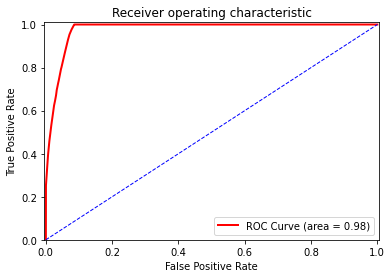

AUC is:  0.977192597092903


In [7]:
my_decisiontree = DecisionTreeClassifier()
my_decisiontree.fit(X, y)
y_predict = my_decisiontree.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)

print('Decision Tree accuracy:', accuracy)              

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_dt = my_decisiontree.predict_proba(X_test)


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_dt[:,1], pos_label=1)
AUC = metrics.auc(fpr, tpr)

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()



print("AUC is: ", AUC)

Knn Classifier below

Cross validation accuracy for Knn:  0.8886111111111112


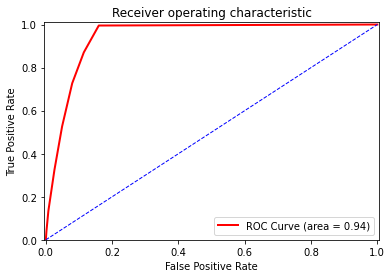

AUC is:  0.942135559651884


In [8]:
k = 7
my_knn = KNeighborsClassifier(n_neighbors=k)
my_knn.fit(X, y)

accuracy_list = cross_val_score(my_knn, X, y, cv=10, scoring='accuracy')

accuracy_cv = accuracy_list.mean()

print('Cross validation accuracy for Knn: ', accuracy_cv)

y_predict_prob_knn = my_knn.predict_proba(X_test)


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_knn[:,1], pos_label=1)
AUC = metrics.auc(fpr, tpr)

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()



print("AUC is: ", AUC)

AdaBoost Classifier below

Accuracy is: 0.8762222222222222


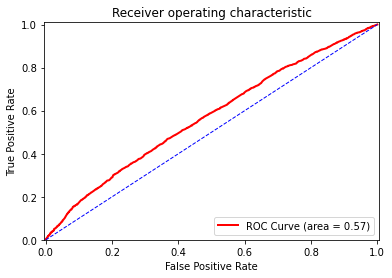

AUC is:  0.5710418008392468


In [9]:
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(X_train, y_train)
y_predict_AB = my_AdaBoost.predict(X_test)
accuracy_AB = accuracy_score(y_test,y_predict_AB)
print("Accuracy is:", accuracy_AB)

#AUC
y_predict_prob_AB = my_AdaBoost.predict_proba(X_test)
fpr_AB, tpr_AB, thresholds_AB = metrics.roc_curve(y_test, y_predict_prob_AB[:,1], pos_label=1)
AUC_AB = metrics.auc(fpr_AB, tpr_AB)
#print(AUC_AB)

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_AB, tpr_AB, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_AB)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()



print("AUC is: ", AUC_AB)

XG Boost Classifier Below

[16:25:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy is: 0.879


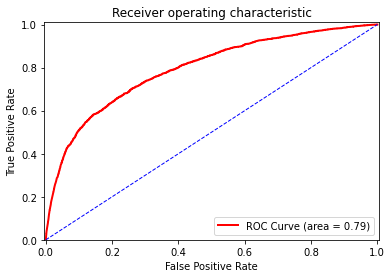

AUC is:  0.7937278622495803


In [10]:
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2, use_label_encoder=False) #last parameter removes warning
my_XGBoost.fit(X_train, y_train)
y_predict_XG = my_XGBoost.predict(X_test)
accuracy_XG = accuracy_score(y_test,y_predict_XG)
print("Accuracy is:", accuracy_XG)

#AUC
y_predict_prob_XG = my_XGBoost.predict_proba(X_test)
fpr_XG, tpr_XG, thresholds_XG = metrics.roc_curve(y_test, y_predict_prob_XG[:,1], pos_label=1)
AUC_XG = metrics.auc(fpr_XG, tpr_XG)
#print(AUC_XG)

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_XG, tpr_XG, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_XG)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()



print("AUC is: ", AUC_XG)

Random Forest Classifier Below

Accuracy is: 0.8977936507936508


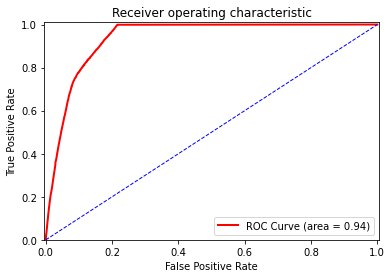

AUC is:  0.9361776054241249


In [11]:
my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train, y_train)
y_predict_RF = my_RandomForest.predict(X_test)
accuracy_RF = accuracy_score(y_test,y_predict_RF)
print("Accuracy is:", accuracy_RF)

#AUC
y_predict_prob_RF = my_RandomForest.predict_proba(X_test)
fpr_RF, tpr_RF, thresholds_RF = metrics.roc_curve(y_test, y_predict_prob_RF[:,1], pos_label=1)
AUC_RF = metrics.auc(fpr_RF, tpr_RF)
#print(AUC_RF)

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_RF, tpr_RF, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_RF)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()



print("AUC is: ", AUC_RF)

Gaussian Naive Bayesian Classifier below


 Accuracy:  0.8760952380952381


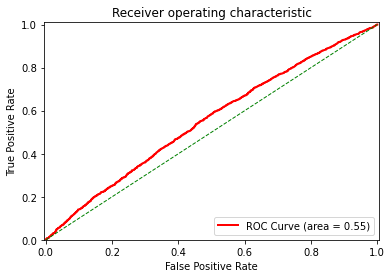

In [12]:
my_nb = GaussianNB()
my_nb.fit(X_train, y_train)
nb_pred = my_nb.predict(X_test)
score_nb = accuracy_score(y_test, nb_pred)
nb_pred_proba = my_nb.predict_proba(X_test)
print('\n','Accuracy: ', score_nb)

#AUC
nb_fpr, nb_tpr, nb_thresholds = metrics.roc_curve(y_test, nb_pred_proba[:,1], pos_label=1)
nb_auc = metrics.auc(nb_fpr, nb_tpr)

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(nb_fpr, nb_tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % nb_auc)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

Linear Regression Below

In [23]:
# In the following line, "my_linreg" is instantiated as an "object" of LinearRegression "class". 
my_linreg = LinearRegression()

# fitting the model to the training data:
my_linreg.fit(X_train, y_train)

# printing Theta0 using attribute "intercept_":
print(my_linreg.intercept_)

# printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_linreg.coef_)

0.10144909683845901
[-8.99584390e-08 -4.02313321e-04 -2.24257507e-03  2.43464883e-02
  2.00899154e-02 -1.69341364e-02 -1.08133228e-04  1.08609823e-05
 -7.70380349e-05  1.04428340e-03 -7.29630834e-04]


In [24]:
# make predictions on the testing set
y_prediction = my_linreg.predict(X_test)

print(y_prediction)

[0.1199763  0.11277349 0.09549438 ... 0.08758198 0.11824633 0.05938801]


In [25]:
# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_prediction)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

0.3272674197609597


MLP Classifier Below

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

my_ANN = MLPClassifier(hidden_layer_sizes=(30,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.02, verbose=True, tol=0.0001)

accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

print('\n\n','accuracy: ',accuracy_list)

Iteration 1, loss = 0.37753239
Iteration 2, loss = 0.37638123
Iteration 3, loss = 0.37646365
Iteration 4, loss = 0.37675153
Iteration 5, loss = 0.37591183
Iteration 6, loss = 0.37601987
Iteration 7, loss = 0.37594735
Iteration 8, loss = 0.37540602
Iteration 9, loss = 0.37521249
Iteration 10, loss = 0.37632461
Iteration 11, loss = 0.37608124
Iteration 12, loss = 0.37554767
Iteration 13, loss = 0.37609803
Iteration 14, loss = 0.37575151
Iteration 15, loss = 0.37592535
Iteration 16, loss = 0.37589895
Iteration 17, loss = 0.37659859
Iteration 18, loss = 0.37544166
Iteration 19, loss = 0.37655355
Iteration 20, loss = 0.37559246
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.37710188
Iteration 2, loss = 0.37612851
Iteration 3, loss = 0.37692992
Iteration 4, loss = 0.37570733
Iteration 5, loss = 0.37616969
Iteration 6, loss = 0.37600638
Iteration 7, loss = 0.37538059
Iteration 8, loss = 0.37639260
Iteration 9, loss = 0.37607317


In [20]:
accuracy_cv = accuracy_list.mean()

print("Accuracy results from our cross validation:", accuracy_cv)

Accuracy results from our cross validation: 0.877


Here we fit the ANN model and calculate the accuracy of the predictions

In [15]:
my_ANN.fit(X_train, y_train)

Iteration 1, loss = 0.37726979
Iteration 2, loss = 0.37801013
Iteration 3, loss = 0.37698461
Iteration 4, loss = 0.37599443
Iteration 5, loss = 0.37633537
Iteration 6, loss = 0.37600821
Iteration 7, loss = 0.37658847
Iteration 8, loss = 0.37584299
Iteration 9, loss = 0.37626336
Iteration 10, loss = 0.37605616
Iteration 11, loss = 0.37573675
Iteration 12, loss = 0.37621095
Iteration 13, loss = 0.37657184
Iteration 14, loss = 0.37687456
Iteration 15, loss = 0.37627103
Iteration 16, loss = 0.37663473
Iteration 17, loss = 0.37599562
Iteration 18, loss = 0.37614228
Iteration 19, loss = 0.37629587
Iteration 20, loss = 0.37551571
Iteration 21, loss = 0.37574411
Iteration 22, loss = 0.37592304
Iteration 23, loss = 0.37575611
Iteration 24, loss = 0.37673181
Iteration 25, loss = 0.37646414
Iteration 26, loss = 0.37589561
Iteration 27, loss = 0.37633867
Iteration 28, loss = 0.37546720
Iteration 29, loss = 0.37656197
Iteration 30, loss = 0.37584754
Iteration 31, loss = 0.37586513
Training loss did

MLPClassifier(activation='logistic', alpha=1, hidden_layer_sizes=(30,),
              learning_rate_init=0.02, random_state=1, verbose=True)

In [21]:
y_predict_ann = my_ANN.predict(X_test)
#print(y_predict_ann)
score_ann = accuracy_score(y_test, y_predict_ann)
print("Accuracy: ",score_ann)

Accuracy:  0.8775595238095238


In [17]:
ann_pred_proba = my_ANN.predict_proba(X_test)
ann_fpr, ann_tpr, ann_thresholds = metrics.roc_curve(y_test, ann_pred_proba[:,1], pos_label=1)
ann_auc = metrics.auc(ann_fpr, ann_tpr)

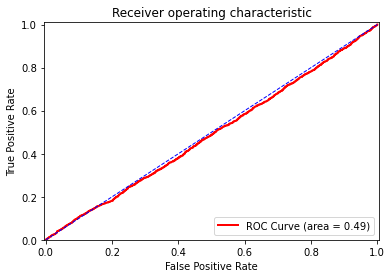

In [18]:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(ann_fpr, ann_tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % ann_auc)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

GridSearch for our ANN model

In [ ]:
neuron_number = [(i,j) for i in range(1,5) for j in range(1,5)]                    

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1e-5, random_state=1, 
                                         learning_rate_init = 0.1, max_iter=400)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X, y)

# view the results:
# print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

{'hidden_layer_sizes': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4)]} 



Below is our LinearSVC Implementation

Achieved an accuracy of 0.8760952380952381

AUC is 0.509

hello


/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy is:  0.8760952380952381
AUC: 0.509


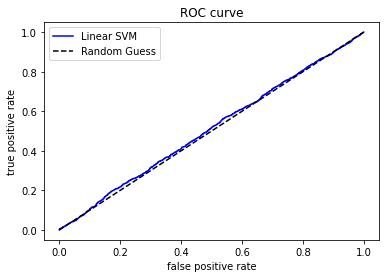

In [18]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score

# c_value = [0.1, 1, 10, 100 ]
# param_grid = dict(C = c_value)
# grid = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy')
# grid.fit(X, y)

# print(grid.best_score_)

# print(grid.best_params_)
print('hello')

svm = LinearSVC(C=1, max_iter=7000)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

score = accuracy_score(y_test, y_pred)

print('Accuracy is: ', score)

decision_scores = svm.decision_function(X_test)
fpr, tpr, thres = metrics.roc_curve(y_test, decision_scores)
print('AUC: {:.3f}'.format(roc_auc_score(y_test, decision_scores)))

# roc curve
plt.plot(fpr, tpr, "b", label='Linear SVM')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

# Accuracy is:  0.8760952380952381
# AUC: 0.509
